## 心血管疾病数据探索分析

---

本次挑战中，您将回答有关心血管疾病（CVD）数据集的问题，并预测患者是否存在心血管疾病（CVD）风险。

### 初步数据分析

首先，导入挑战所需模块：

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

本次挑战将优先选择 Seaborn 用于绘图，下面我们定义 Seaborn 全局绘图参数，保证后续图像更加整洁美观。

In [2]:
sns.set()
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize": (11, 8),
        "axes.titlesize": 18
    }
)

rcParams['figure.figsize'] = 11, 8


接下来，读取并预览数据集。

In [3]:
df = pd.read_csv("files/mlbootcamp5_train.csv", sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


数据集特征表示如下：

| Feature | Variable Type | Variable      | Value Type |
|:---------:|:--------------:|:---------------:|:------------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

所有数据均为医学检查时收集，主要包含 3 种类别的特征：
- Objective Feature: 基础事实数据。
- Examination Feature: 体检结果。
- Subjective Feature: 患者给出的主观信息。

接下来，我们探索数据值分布情况。这里使用 [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html) 绘制出变量特征的计数条形图。

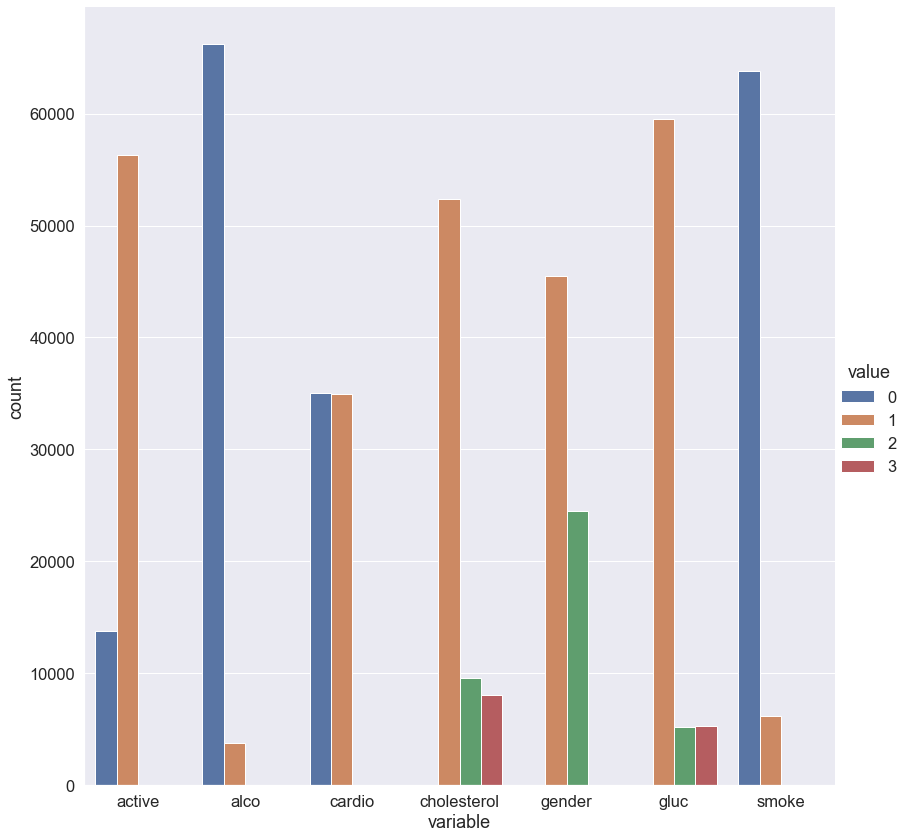

In [4]:
df_uniques = pd.melt(frame=df, value_vars=[
                     'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()).sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()

sns.catplot(x='variable', y='count', hue='value',
            data=df_uniques, kind='bar', height=12)


接下来，让我们按目标值分割数据集，这样往往可以通过绘图结果快速找出相对重要的特征。

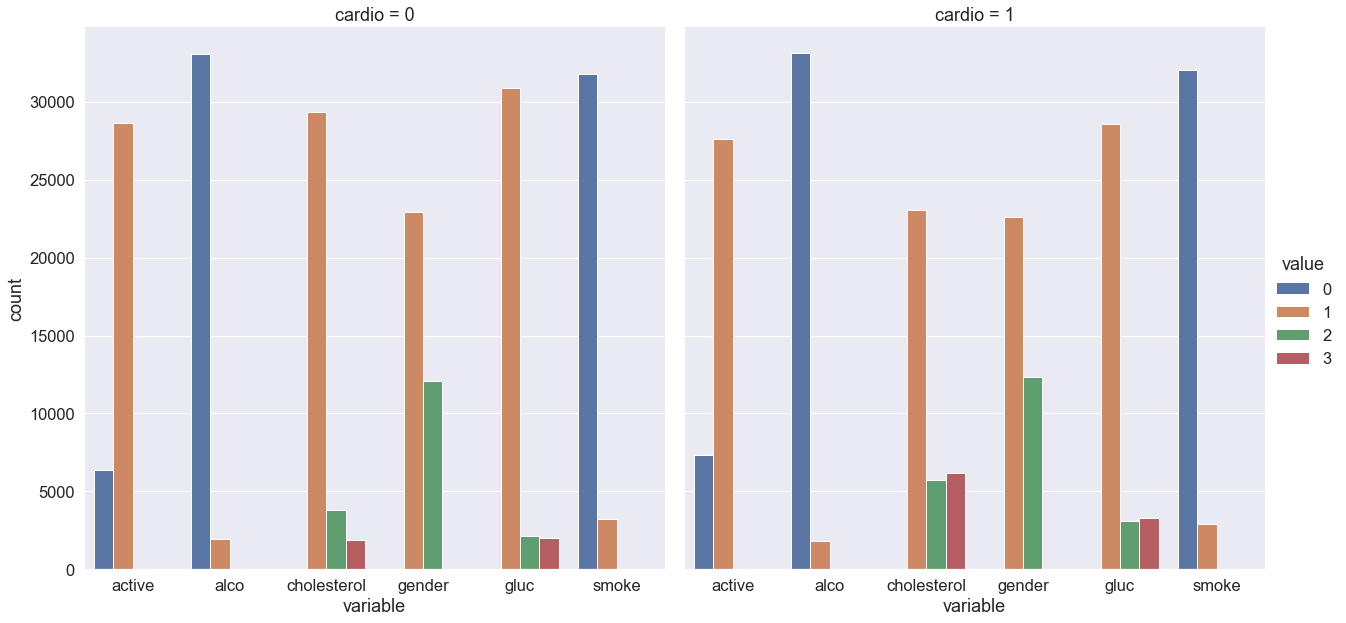

In [5]:
df_uniques = pd.melt(frame=df, value_vars=[
                     'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])[
                          'value'].count()).sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()

sns.catplot(x='variable', y='count', hue='value', col='cardio',
            data=df_uniques, kind='bar', height=9)


您可以看到胆固醇和葡萄糖水平对目标变量影响明显较大。这是巧合吗？

接下来，你需要自行补充必要的代码来回答相应的挑战问题。

---

### 进一步观察

**问题:** 数据集中有多少男性和女性？由于 `gender` 特征没有说明男女，你需要通过分析身高计算得出。

- [ A ] 45530 女性 和 24470 男性
- [ B ] 45530 男性 和 24470 女性
- [ C ] 45470 女性 和 24530 男性
- [ D ] 45470 男性 和 24530 女性

In [6]:
df.groupby(['gender'])['height'].agg(['mean', 'count'])

,mean,count
gender,,
1,161.355612,45530
2,169.947895,24470


由上述分析可得，答案为 A

**问题:** 数据集中男性和女性，哪个群体饮酒的频次更高？

- [ A ] 女性
- [ B ] 男性

In [7]:
df.groupby(['gender'])['alco'].agg(['mean'])

,mean
gender,
1,0.025500
2,0.106375


由上述分析可得，答案为 B

**问题：** 数据集中男性和女性吸烟者所占百分比的差值是多少？

- [ A ] 4
- [ B ] 16
- [ C ] 20
- [ D ] 24

In [8]:
df.groupby(['gender'])['smoke'].agg(['mean'])

,mean
gender,
1,0.017856
2,0.218880


由上述分析可得，答案为 C

**问题：** 数据集中吸烟者和非吸烟者的年龄中位数之间的差值（以月计）近似是多少？你需要尝试确定出数据集中 `age` 合理的表示单位。

- [ A ] 5
- [ B ] 10
- [ C ] 15
- [ D ] 20

本次挑战规定 1 年为 365.25 天。

In [9]:
print(np.round(np.abs(df[df['smoke']==0]['age'].median() - df[df['smoke']==1]['age'].median())/365.25*12))

20.0


由上述分析，可得答案为 D

### 风险量表图

欧洲心脏病学会的网站上给出了 [<i> SCORE scale</i>](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) 量表。它可以用于计算未来 10 年心血管疾病死亡的风险。

<img src='images/cardio_score.png' width=50%>

让我们来看看最右上角的矩形，也就是 60 到 65 岁的吸烟男性的子集。其中，矩形的左下角看到一个值 9，在右上角看到 47。量表意味着对于收缩压（纵坐标）低于 120 （正常血压）的性别年龄组的人来说，心血管疾病的风险估计比收缩压为 $[160, 180)$ 的患者（高血压）低 5 倍（47/9）。

接下来，让我们结合量表，并利用挑战数据集进行计算。这里需要注意的是，量表中胆固醇（Cholesterol）水平和挑战数据单位不太一样，我们使用对应关系为：`4 mmol/l` $\rightarrow$ `1`, `5-7 mmol/l` $\rightarrow$ `2`, `8 mmol/l` $\rightarrow$ `3`。

**问题：** 计算 $[60, 65)$ 年龄区间中吸烟男性，较健康人群（胆固醇类别 1，收缩压低于 120）与高风险人群（胆固醇类别为 3，收缩压 $[160, 180)$）各自心血管病患所占比例。并最终求得二者比例的近似倍数。

- [ A ] 1
- [ B ] 2
- [ C ] 3
- [ D ] 4

先选出年龄区间在$[60,65)$的吸烟男性

In [10]:
df['age_years']=(df['age']/365.25).round().astype('int')
smoking_oldman = df[(df['gender']==2)&(df['age_years']>=60)&(df['age_years']<65)&(df['smoke']==1)]

In [11]:
health_ratio = smoking_oldman[(smoking_oldman['cholesterol']==1)&(smoking_oldman['ap_hi']<120)]['cardio'].mean()
print(health_ratio)

0.2631578947368421


胆固醇类别为 1，收缩压低于 120，心血管疾病患者的比例为 26%。

In [12]:
hirisk_ratio = smoking_oldman[(smoking_oldman['cholesterol']==3)&(smoking_oldman['ap_hi']>=160)&(smoking_oldman['ap_hi']<180)]['cardio'].mean()
print(hirisk_ratio)

0.8636363636363636


胆固醇类别为 3，收缩压 $[160, 180)$，心血管疾病患者的比例为 86%。

In [13]:
times = round(hirisk_ratio/health_ratio)
print(times)

3


所以，挑战数据给出的比例大约是 $\frac{0.86}{0.26} \approx 3$ 倍(答案选 C)，而量表给出的是 5 倍。当然，这依赖与给定年龄组中的病人比例

### BMI 指数分析

挑战将需要创建一个新的特征 BMI，BMI 为身高体重指数，其可以反映体重的标准情况，计算公式为：
$$BMI = \frac{weight (kg)}{height^2 (m)}$$

正常 BMI 指数一般在 18.5 到 25 之间。

**问题：** 请选择下面叙述正确的有：
- [ A ] 数据集样本中 BMI 中位数在正常范围内。
- [ B ] 女性的平均 BMI 指数高于男性。
- [ C ] 健康人群的 BMI 平均高于患病人群。
- [ D ] 健康和不饮酒男性中，BMI 比健康不饮酒女性更接近正常值。

In [14]:
df['BMI']=df['weight']/((df['height']/100)**2)
df['BMI'].median()

26.374068120774975

BMI 中位数为 26.37406，不在正常范围中，故A错误。

In [15]:
df[df['gender']==1]['BMI'].mean()>df[df['gender']==2]['BMI'].mean()

True

由上述结果得，B正确

In [16]:
df[df['cardio']==0]['BMI'].mean()>df[df['cardio']==1]['BMI'].mean()

False

由上述结果可知，C错误。

In [17]:
BMI_Male=df[(df['gender']==2)&(df['cardio']==0)&(df['alco']==0)]['BMI'].mean()
BMI_Female=df[(df['gender']==1)&(df['cardio']==0)&(df['alco']==0)]['BMI'].mean()
print("Male: {} , Female: {} ".format(BMI_Male,BMI_Female))

Male: 25.87263807546017 , Female: 26.845406594131507 


由上述结果可知男性的平均BMI比女性的平均BMI更接近正常值，故D正确。

### 数据清洗

你可能会注意到给出的数据并不够完美，在进一步可视化之前，我们需要对数据进行清洗。

**问题：** 请按照以下列举的项目，过滤掉数据中统计有误的部分：
- 血压特征中，舒张压高于收缩压的样本。
- 身高特征中，低于 2.5％ 分位数的样本。
- 身高特征中，高于 97.5％ 分位数的样本。
- 体重特征中，低于 2.5％ 分位数的样本。
- 体重特征中，高于 97.5％ 分位数的样本

分位数请使用 `pd.Series.quantile` 方法进行确定，不熟悉可以阅读 [<i > 官方文档</i>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html)

In [18]:
flitered_df = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]


**问题：** 清洗掉的数据占原数据总量的近似百分比？
- [ A ] 8%
- [ B ] 9%
- [ C ] 10%
- [ D ] 11%

In [19]:
(df.shape[0]-flitered_df.shape[0])/df.shape[0]

0.0963

故答案选择 C

### 数据可视化分析

要更好地理解数据集特征，接下来使用过滤之后的数据创建特征之间相关系数的矩阵。

**问题：** 使用 [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) 绘制特征之间的皮尔逊相关性系数矩阵。

<AxesSubplot:>

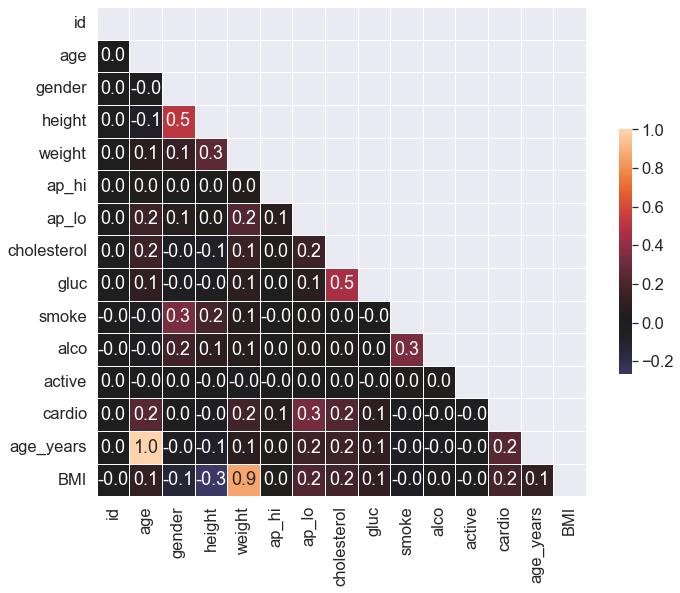

In [21]:
# 计算相关系数矩阵
df = flitered_df.copy()
corr_matrix = df.corr(method='pearson')

# 创建一个 Mask 来隐藏相关矩阵的上三角
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 绘制图像
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, mask=mask, vmax=1, center=0, annot=True, fmt='.1f', square=True, linewidths=.5, cbar_kws={'shrink': .5})

**问题：** 以下哪组特征与性别的相关性更强？
- [ A ] Cardio, Cholesterol
- [ B ] Height, Smoke
- [ C ] Smoke, Alco
- [ D ] Height, Weight

由上图可知：Height 和 smoke 与性别的相关性较强，分别达到 0.5 与 0.3 左右，故选择 B

### 男女身高分布

前面的探索中，我们知道性别对应 1 和 2，虽然不知道不同性别对应哪个值，但可以通过平均身高和体重来确定。

**问题：** 绘制身高和性别之间的小提琴图 [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)。

这里建议通过 `hue` 参数按性别划分，并通过 `scale` 参数来计算性别对应的具体数量。为了便于你能正确绘制，这里给出一个 [参考示例](https://stackoverflow.com/questions/41573283/seaborn-violin-plot-with-one-data-per-column/41575149#41575149)。

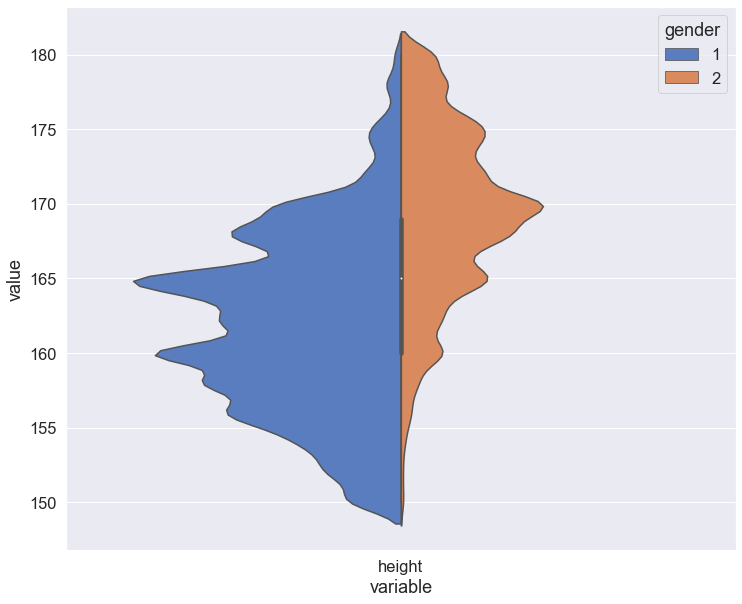

In [35]:
df_melt = pd.melt(frame=df, id_vars=['gender'], value_vars=['height'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(x='variable', y='value' ,hue='gender', data=df_melt, scale= 'count', split=True, palette="muted", scale_hue=False)

**问题：** 绘制身高和性别之间的核密度图 [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)。

通过核密度图可以更清楚地看到性别之间的差异，但却无法得到每个性别对应的具体人数。

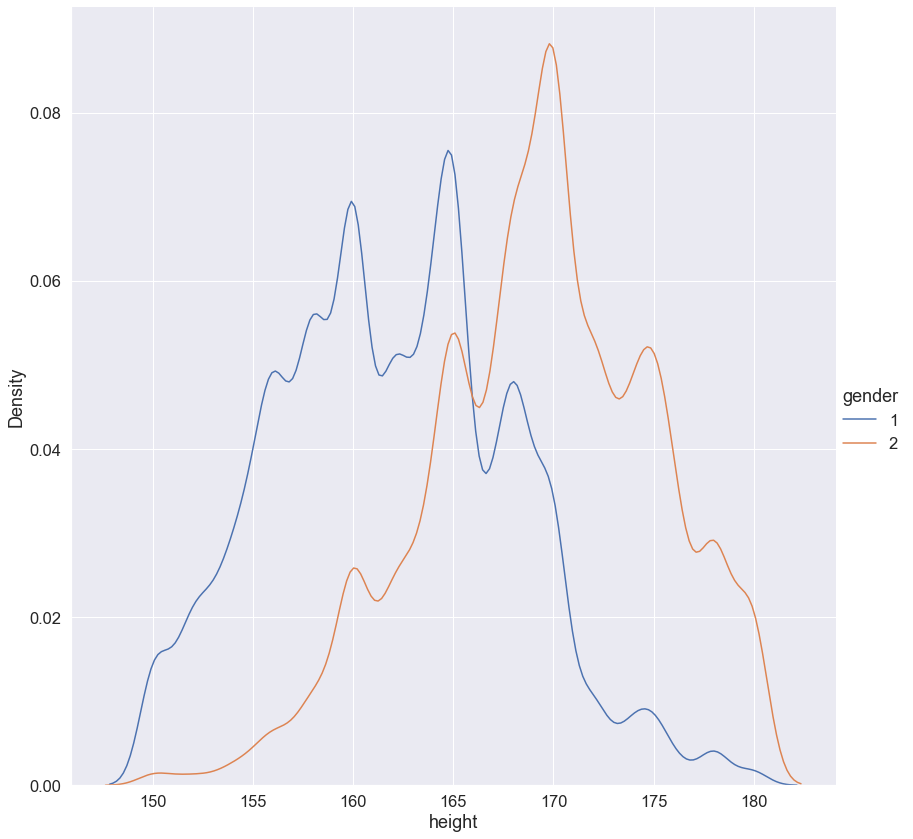

In [43]:
sns.FacetGrid(df, hue='gender', height=12).map(sns.kdeplot, 'height').add_legend()

大多数情况下，皮尔逊相关性指数可以看出特征之间的相关程度。不过，这里我们进一步绘制 [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) 斯皮尔曼等级相关系数对应的图像。它利用单调方程评价两个统计变量的相关性，是用于衡量两个变量的依赖性的非参数指标。

**问题：** 使用 [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) 绘制特征之间的斯皮尔曼等级相关系数矩阵。

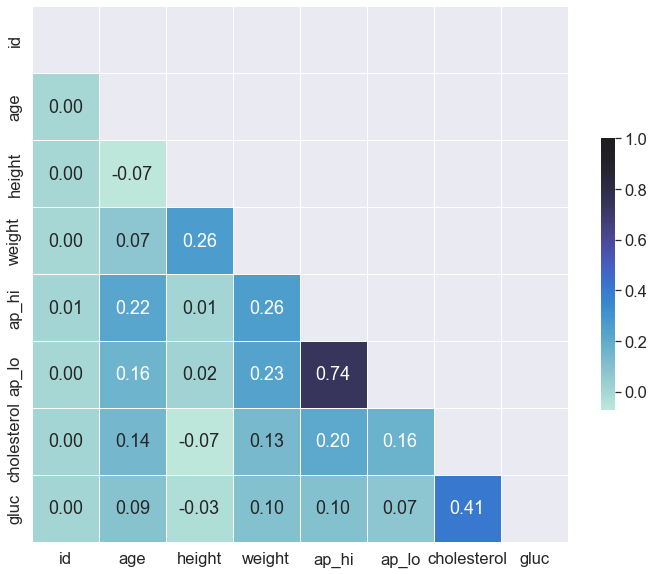

In [57]:
df_spearman=df[['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]
spearman_martrix = df_spearman.corr(method='spearman')

mask = np.zeros_like(spearman_martrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

_, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(spearman_martrix, mask=mask, vmax=1, annot=True, center=1 ,fmt='.2f',square=True, linewidths=.5, cbar_kws={'shrink': .5})

**问题：** 下列那一组特征具有最强的 Spearman 相关性？
- [ A ] Height, Weight
- [ B ] Age, Weight
- [ C ] Cholesterol, Gluc
- [ D ] Cardio, Cholesterol
- [ E ] Ap_hi, Ap_lo
- [ F ] Smoke, Alco

由上图可知，答案应该选择 E

### 年龄可视化

上面，我们已经计算过受访者的年龄。接下来，我们对其进行可视化。

**问题：** 请使用 [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) 绘制年龄分布计数图，横坐标为年龄，纵坐标为对应的人群数量。

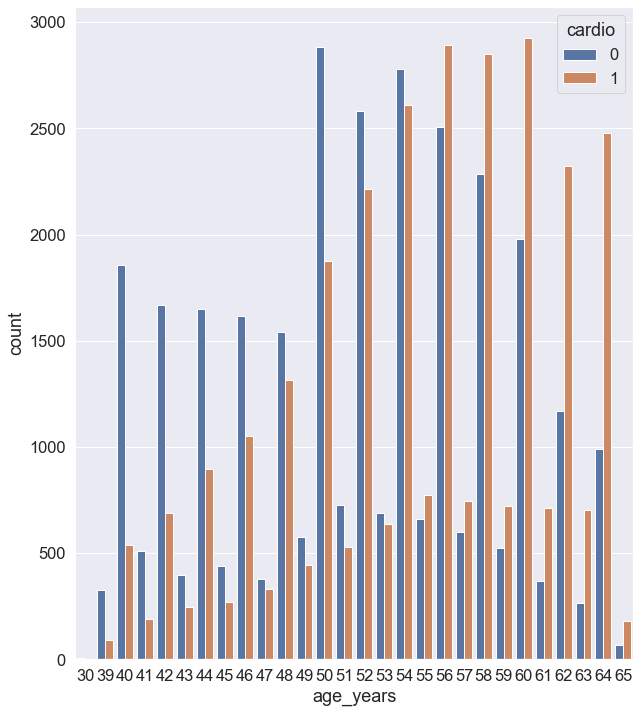

In [59]:
_, ax = plt.subplots(figsize=(10, 12))
ax = sns.countplot(x='age_years', hue='cardio', data=df)

**问题：** 在哪个年龄下，心血管疾病患者人数首次超过无心血管疾病患者人数？
- [ A ] 44
- [ B ] 55
- [ C ] 64
- [ D ] 70

由上面的 countplot 可得答案是 55 岁，选择B